In [22]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt


In [23]:
# Importing the model
model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")
model.objective = "BIOMASS_RT" 
model.optimize()

,fluxes,reduced_costs
ALCD25yi,0.000000,1.110223e-16
MTHFCm,0.000000,7.589415e-19
AMPN,0.000000,-3.655307e-03
DAGCPTer_RT,0.000000,0.000000e+00
PYRt2,0.000000,0.000000e+00
...,...,...
PYDXNtr,0.000000,-0.000000e+00
RIBFLVt2,0.000000,0.000000e+00
tr_0001,0.000000,0.000000e+00
EXC_OUT_phyto_d,0.000000,0.000000e+00


In [24]:
# ## Saving json model
# from cobra.io import save_json_model
# save_json_model(model, f"C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb_model.json")

In [25]:
# Lab data
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 2.6619851, 3.1] # the fifth glc uptake value was calculated
solution = model.optimize()
# All fluxes
all_fluxes = solution.fluxes.to_frame(name='Flux')
# model.summary()
# model.reactions.XPK.summary()
# model.metabolites.actp_c.summary()
# all_fluxes.loc['XPK']
# model.reactions.ACITL.flux
# solution.fluxes[['EX_glc__D_e', 'XPK']].values

In [26]:
# # Get all fluxes to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Rt_IFO0880_jsb_results\\ppp_fluxes_dif_glc_uptakes.xlsx') as excel_writer:
#     all_fluxes.to_excel(excel_writer, sheet_name='Glucose uptake range 0.49-3.1', index=True)

In [27]:

# glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 2.6619851, 3.1] # the fifth glc uptake value was calculated

XPK_bounds =   [0.181042, 0.440304, 0.729, 0.81, 1.069314, 1.247297] # [0.26, 0.54, 0.81, 1.1, 1.34, 1.63]
# # model.reactions.XPK.bounds


In [28]:
# i = 3
# medium = model.medium
# medium["EX_glc__D_e"] = glucose_uptakes[i]
# model.medium = medium
# model.reactions.XPK.bounds = XPK_bounds[i], XPK_bounds[i]
# solution = model.optimize()

# all_fluxes = solution.fluxes.to_frame(name='Flux')
# all_fluxes


In [29]:
# all_fluxes.loc[['BIOMASS_RT', 'EX_glc__D_e', 'ATPM', 'ACITL', 'ACS', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm', 'FPK', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e'], :]

In [30]:
# Get all fluxes on different glucose uptake
all_fluxes_dif_glucose_uptakes = pd.DataFrame(columns=['Glucose uptake', *all_fluxes.index], index=range(len(glucose_uptakes))) #flux_values.index gives the row names column, * extracts the list of strings
biomass_GR = []

for i in range(len(glucose_uptakes)):
    medium = model.medium
    medium["EX_glc__D_e"] = glucose_uptakes[i]
    model.medium = medium
    model.reactions.XPK.bounds = XPK_bounds[i], XPK_bounds[i]
    
    solution = model.optimize()
    all_fluxes_dif_glucose_uptakes.loc[i] = solution.fluxes[['EX_glc__D_e', *all_fluxes.index]].values
    biomass_GR += [solution.objective_value]
all_fluxes_dif_glucose_uptakes.insert(0, 'Biomass growth rate', biomass_GR, True)

all_fluxes_dif_glucose_uptakes
biomass_GR

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
c:\Users\Maive\miniconda3\envs\bachelor_thesis\Lib\site-packages\cobra\medium\boundary_types.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
c:\Users\Maive\miniconda3\envs\bachelor_thesis\Lib\site-packages\cobra\medium\boundary_types.py:97: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer key

[0.03381832023210637,
 0.08214231125623192,
 0.1223487769336251,
 0.17242812864920729,
 0.1993802669435557,
 0.23255258965717907]

In [31]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_dif_glucose_uptakes[['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]
exchange_fluxes_table

,EX_glc__D_e,EX_o2_e,EX_nh4_e,EX_so4_e,EX_pi_e,EX_co2_e
0,-0.476,-1.144635,-0.223211,-0.00339,-0.009003,1.270553
1,-1.114,-2.527215,-0.542163,-0.008234,-0.021868,2.83306
2,-1.648,-3.696579,-0.807538,-0.012264,-0.032571,4.152129
3,-2.305,-5.10433,-1.138076,-0.017284,-0.045903,5.746343
4,-2.661985,-5.882336,-1.315968,-0.019985,-0.053078,6.624702
5,-3.1,-6.831751,-1.534915,-0.023311,-0.061909,7.697629


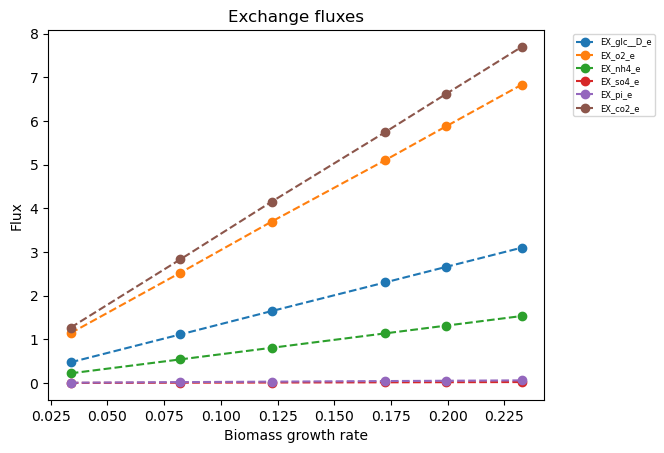

In [32]:
# Exchange fluxes plot
GR_range = all_fluxes_dif_glucose_uptakes['BIOMASS_RT']
plt.plot(GR_range, np.abs(exchange_fluxes_table[exchange_fluxes_table.columns]), 'o--', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux'
           )
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.yticks(range(0, 20, 1))
plt.show()

In [33]:
PPP_fluxes = all_fluxes_dif_glucose_uptakes[['BIOMASS_RT', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK', 'FBA', 'PYRDC','PDHm', 'FPK']]
# Change G6PDH2rp column name to oxpp 
# PPP_fluxes = PPP_fluxes.rename(columns = {'G6PDH2r': 'oxpp'})
# PPP_fluxes

for i in range(len(PPP_fluxes.columns)):
    PPP_fluxes = PPP_fluxes.rename(columns = {PPP_fluxes.columns[i]: getattr(model.reactions, PPP_fluxes.columns[i]).name})
PPP_fluxes = PPP_fluxes.rename(columns = {'Glucose 6-phosphate dehydrogenase': 'oxpp'})

PPP_fluxes

,Biomass,D-Glucose exchange,oxpp,Transketolase,Transaldolase,Transketolase,Xylulose-5-phosphate phosphoketolase,Fructose-bisphosphate aldolase,Pyruvate decarboxylase,Pyruvate dehydrogenase,Fructose-6-phosphate phosphoketolase
0,0.033818,-0.476,0.0,-0.076405,-0.307256,-0.082735,0.181042,0.0,0.031079,0.419896,0.0
1,0.082142,-1.114,0.0,-0.185771,-0.703944,-0.201146,0.440304,0.0,0.075489,0.93518,0.0
2,0.122349,-1.648,0.07094,-0.277447,-0.965546,-0.300347,0.729,0.0,0.07964,1.330746,0.0
3,0.172428,-2.305,0.042795,-0.337608,-1.453791,-0.369881,0.81,0.0,0.158463,1.958099,0.0
4,0.19938,-2.661985,0.026914,-0.442137,-1.648537,-0.479455,1.069314,0.0,0.183232,2.176607,0.0
5,0.232553,-3.1,0.037231,-0.513777,-1.91402,-0.557304,1.247297,0.0,0.213718,2.526992,0.0


In [34]:
ATPM_ACITL_fluxes = all_fluxes_dif_glucose_uptakes[['BIOMASS_RT', 'EX_glc__D_e', 'ATPM', 'ACITL']] #ACS - Acetyl-CoA synthetase
ATPM_ACITL_fluxes



,BIOMASS_RT,EX_glc__D_e,ATPM,ACITL
0,0.033818,-0.476,1.22,0.000565
1,0.082142,-1.114,1.22,0.000808
2,0.122349,-1.648,1.22,0.0
3,0.172428,-2.305,1.22,0.115955
4,0.19938,-2.661985,1.22,0.001376
5,0.232553,-3.1,1.22,0.001532


In [35]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
GR_range = all_fluxes_dif_glucose_uptakes['BIOMASS_RT']
# Sample data
x = GR_range
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']])
y2 = np.abs(PPP_fluxes[['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm']])

# # Define colors for each label
# colors = {'ATPM': 'black', 'ACITL': 'orange', 'oxpp': 'yellow', 'TKT1': 'green', 'TKT2': 'blue', 'TALA': 'red', 'XPK': 'pink','PYRDC': 'brown' ,'PDHm': 'purple'}
# labels = ['ATPM', 'ACITL', 'oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']
# Create the first plot
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATPM', 'ACITL'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

KeyError: "['TKT1', 'TALA', 'TKT2', 'XPK', 'PYRDC', 'PDHm'] not in index"

In [ ]:
# # Get all fluxes to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Rt_IFO0880_jsb_results\\all_fluxes_w_XPK_bounds2_dif_glc_uptakes.xlsx') as excel_writer:
#     all_fluxes_dif_glucose_uptakes.to_excel(excel_writer, sheet_name='Glucose uptake range 0.49-3.1', index=True)

In [ ]:
# # # #  Get csv files
# glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 2.6619851, 3.1]
# i = 1
# all_fluxes_dif_glucose_uptakes.loc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Rt_IFO0880_jsb_results\\SImulations_w_XPK_bounds\\all_fluxes_w_XPK_bounds_glucose_uptake_{glucose_uptakes[i]}.csv', index=True)


# for i in range(len(glucose_uptakes)):
#     all_fluxes_dif_glucose_uptakes.loc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Rt_IFO0880_jsb_results\\SImulations_w_XPK_bounds\\all_fluxes_glucose_uptake_{glucose_uptakes[i]}.csv', index=True)